___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 5<br><br>CNN Syntax Basics<br><br>MNIST Data<br><h1>

# Dataset Info

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support-vector machine to get an error rate of 0.8%.

![3Dto2D](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")                #gpu kullanıyormuyum kontrolü

[]

# Recognizing and Understanding Data

In [ ]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# Checking the shape of one image
X_train[9].shape

(28, 28)

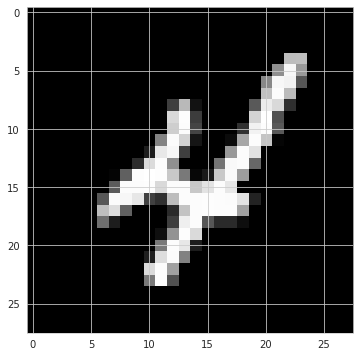

In [ ]:
plt.imshow(X_train[9],cmap='gray')                # cmap yazmayınca da çalışır ama sahte renkli gözükür zaten shape'den de anlaşılıyor 
# plt.matshow(X_train[9])

In [ ]:
X_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  

In [ ]:
##  0 sayisi siyahı temsil ediyor; pixeller 255' e doğru gittikce renk beyazlaşıyor 

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[9]

4

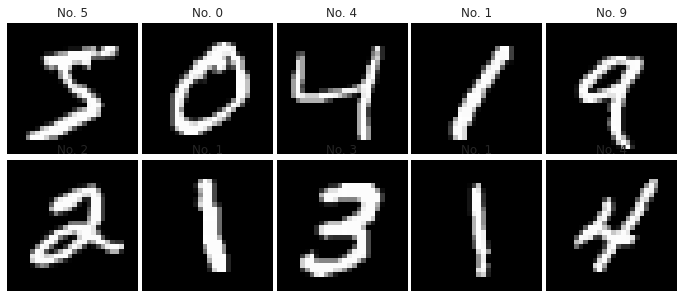

In [ ]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
X_train.shape[0]

60000

[  458 51755 59682  4728 20466 24530 48364 54103 24674]


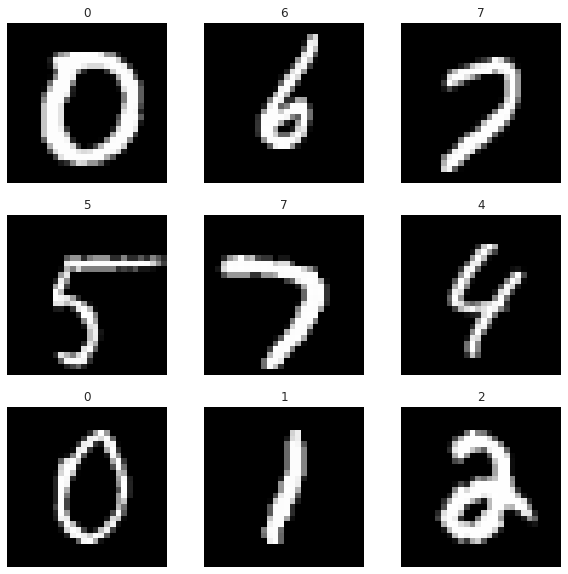

In [ ]:
ix = np.random.choice(np.arange(X_train.shape[0]),9)
print(ix)
plt.figure(figsize = (10,10))
c = 1
for i in ix:
  ax = plt.subplot(3,3,c)
  plt.imshow(X_train[i],"gray")
  plt.title(y_train[i])
  c += 1
  plt.axis("off")
  

# Data Preprocessing

In [ ]:
X_train[9].min()

0

In [ ]:
X_train[9].max()

255

In [ ]:
X_test1 = X_test.copy()

In [ ]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255                         # zaten min 0 max 255
X_test /= 255

In [ ]:
## normalizasyon işlemi yapıldıktan sonra resmin yapısı bozulmaz YİNE AYNI RESMİ ELDE EDERİZ .NORMALİZASYON YAPILMADAN ÖNCE KONTROL GEREKİYOR ÇÜNKÜ SCALE EDİLMİŞ OLARAK GELEBİLİR

In [ ]:
X_train[9].min()

0.0

In [ ]:
X_train[9].max()

0.003921569

In [ ]:
type(X_train[9].max())

numpy.float32

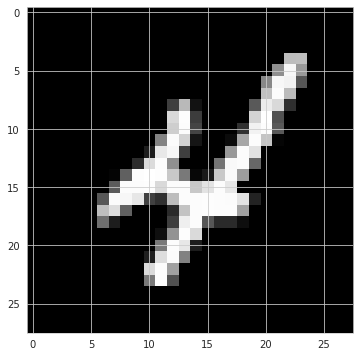

In [ ]:
plt.imshow(X_train[9],cmap='gray')

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# con2d'lerde  tensörün 3 boyutlu olması GEREKİYOR :  28*28*1 gibi olmalı 

In [ ]:
X_train.reshape(60000, 28, 28, 1).shape               # BENİM GRAY TYPE OLDUĞU İÇİN RESİM 1 CHANNELLI BUNU YAPMAMIZ GEREKİYOR

(60000, 28, 28, 1)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
# X_train_new = X_train_new[...,np.newaxis]
# X_test_new = X_test_new[...,np.newaxis]                        ## 60000 tane 28*28*1'Lik boyutumuz artık
# X_train_new.shape

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train.shape

(60000,)

 # y_train rakamlar -------------------> ama benim outputum :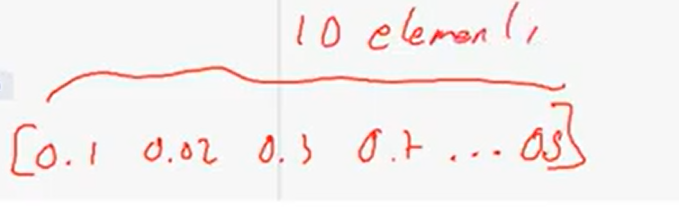

In [ ]:
## y_train de şöyle olsa daha güzel olur aslında.

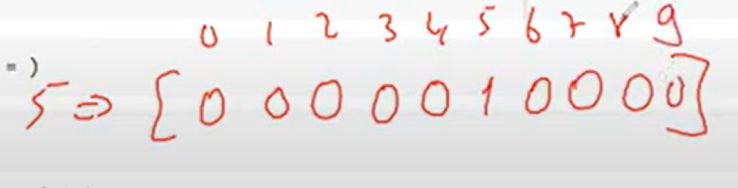

In [ ]:
# y_train'i buna çevirmemize gerek yok **** tensorflow bizim yerimize yapacak. yani y_train : sparse matrix şeklinde loss'lardan sparse olanı seç
# 2.YOL KERAS TO_CATEGORİCAL HANGİSİ BİZE UYARSA ONU YAPALIM.TO CATEGORİCAL YAPMAZ İSEK COMPİLE KISMINA DİKKAT.

In [ ]:
# model.compile(optimizer = "adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ["accuracy"])
#                                                                                    ##daha stabil gözükmesi için

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
Y_train = to_categorical(y_train, 10)                 # 10 : KAÇ TANE CATOGORİK OLMASINI BİZ SÖYLÜYORUZ.
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [ ]:
y_train[9]                    

4

In [ ]:
Y_train[9]                           # BİZ DERSTE OUTPUT BÖYLE OLSA DEDİĞİMİZ HALE ÇEVİRDİK

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid  BUNLAR DEFAULT STRİDE PADDİNG
                                                  # yükseklik , genişlik ,derinkik
                                                 # satır     , sütun    , kanal sayısı (rgb,wb or gray)

model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size İLE AYNI OLUR DEFAULT OLARAK, padding = valid

model.add(Flatten())

model.add(Dense(128, activation='relu'))        # BURADA MİN 128 SEÇELİM

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [ ]:
((3 * 3 * 1) + 1) * 32

320

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=15, validation_data=(X_test,Y_test),callbacks=[early_stop]) 


Epoch 1/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.7368 - accuracy: 0.7899 - val_loss: 0.3387 - val_accuracy: 0.9015
Epoch 2/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.3204 - accuracy: 0.9057 - val_loss: 0.2737 - val_accuracy: 0.9214
Epoch 3/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2659 - accuracy: 0.9221 - val_loss: 0.2334 - val_accuracy: 0.9332
Epoch 4/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2232 - accuracy: 0.9332 - val_loss: 0.1958 - val_accuracy: 0.9402
Epoch 5/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1892 - accuracy: 0.9437 - val_loss: 0.1678 - val_accuracy: 0.9496
Epoch 6/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1634 - accuracy: 0.9509 - val_loss: 0.1527 - val_accuracy: 0.9525
Epoch 7/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1458 - accuracy: 0.9564 - val_loss: 0.1382 -

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
Y_train.shape            # to categoricaldan geldi bu 10

(60000, 10)

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.737,0.790,0.339,0.901
1,0.320,0.906,0.274,0.921
2,0.266,0.922,0.233,0.933
3,0.223,0.933,0.196,0.940
4,0.189,0.944,0.168,0.950


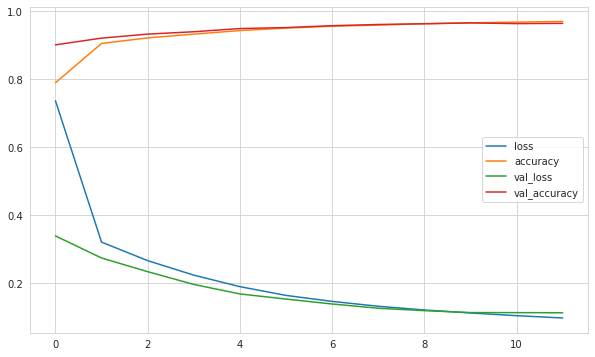

In [ ]:
summary.plot();

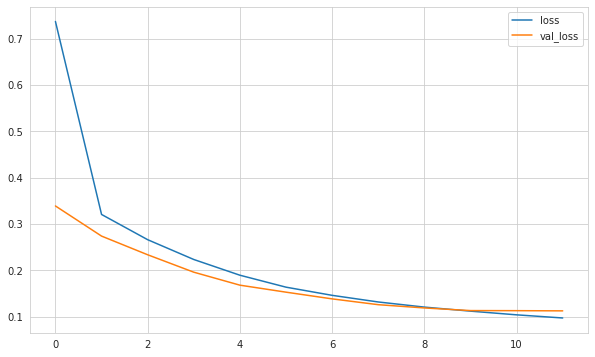

In [ ]:
summary[["loss", "val_loss"]].plot();

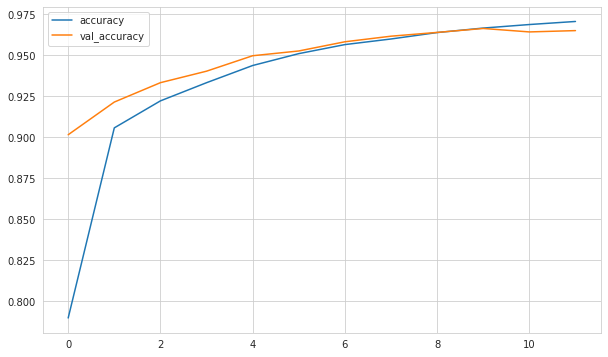

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [ ]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1129 - accuracy: 0.9662


[0.11292039602994919, 0.9661999940872192]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11292039602994919
Test accuracy: 0.9661999940872192


In [ ]:
pred_prob = model.predict(X_test)
pred_prob

array([[1.76921233e-07, 1.78427384e-09, 7.42491757e-05, ...,
        9.98837531e-01, 7.46584305e-07, 2.64907740e-05],
       [3.25814886e-09, 3.36864068e-05, 9.99839783e-01, ...,
        5.46725339e-11, 5.48482205e-07, 2.33006621e-13],
       [4.95621543e-06, 9.95955467e-01, 2.28903862e-03, ...,
        7.88980979e-04, 6.64469728e-04, 1.27407411e-05],
       ...,
       [8.68194017e-10, 4.66747439e-11, 1.77570569e-09, ...,
        2.47826870e-06, 1.63325922e-06, 7.31366454e-05],
       [6.88626978e-09, 6.21050020e-08, 1.91098763e-08, ...,
        1.22688002e-08, 1.06183009e-03, 8.13720202e-11],
       [4.59812545e-05, 1.16316109e-13, 6.54707765e-06, ...,
        3.74380518e-12, 5.04899020e-08, 1.05082415e-10]], dtype=float32)

In [ ]:
pred_prob.shape

(10000, 10)

In [ ]:
pred_prob[0]

array([1.7692123e-07, 1.7842738e-09, 7.4249176e-05, 1.0607103e-03,
       1.0881456e-11, 9.1795158e-08, 1.4849630e-15, 9.9883753e-01,
       7.4658431e-07, 2.6490774e-05], dtype=float32)

In [ ]:
np.argmax(pred_prob[0])

7

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_pred.shape

(10000,)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.96      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.95      0.98      0.96       982
           5       0.97      0.95      0.96       892
           6       0.97      0.97      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.95      0.96      0.96       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
print(confusion_matrix(y_test, y_pred))         # heatmap daha iyi

[[ 965    0    1    2    0    3    5    3    1    0]
 [   0 1118    4    1    0    1    4    1    6    0]
 [   6    3  992    6    5    2    4    5    9    0]
 [   0    0    8  977    2    4    0    5    9    5]
 [   0    0    4    1  963    0    3    1    2    8]
 [   2    0    0   16    2  850   10    1    6    5]
 [   5    2    0    0    6    7  932    0    6    0]
 [   1    6   13    4    5    1    0  983    2   13]
 [   3    2    3   11    8    7    3    1  932    4]
 [   3    6    2   11   26    4    1    3    3  950]]


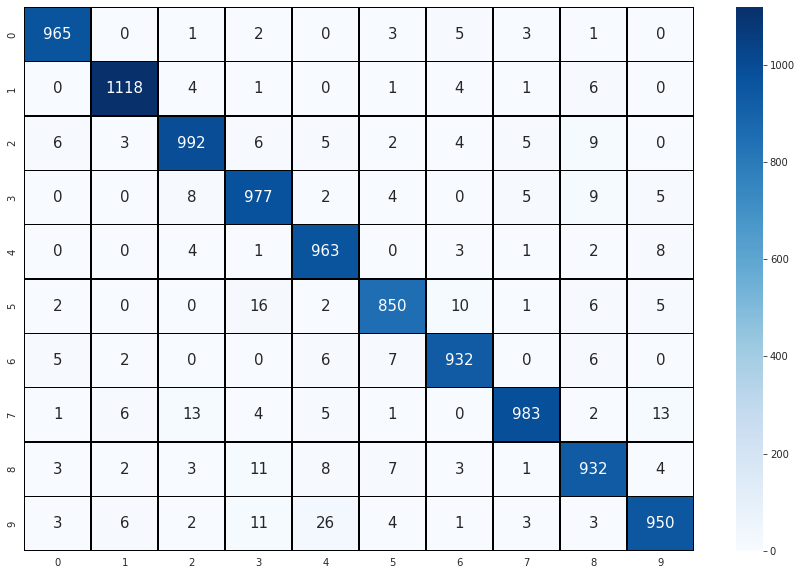

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [ ]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
(y_test != y_pred).sum()

338

2
3


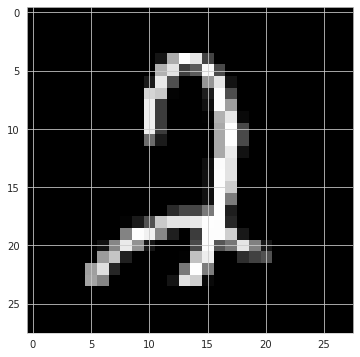

In [ ]:
ix = y_test != y_pred



print(y_test[ix][135])
print(y_pred[ix][135])

plt.imshow(X_test1[ix][135],"gray")

In [ ]:
y_pred[ix][135]

3

In [ ]:
pred_prob[ix][135]

array([6.4981054e-04, 4.6744712e-02, 2.7325699e-01, 3.2417470e-01,
       1.9420862e-04, 2.6950394e-03, 1.0409841e-04, 1.6953979e-01,
       1.4182198e-01, 4.0818572e-02], dtype=float32)

<BarContainer object of 10 artists>

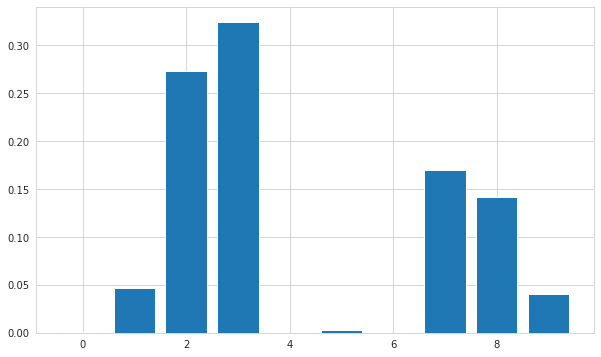

In [ ]:
plt.bar(range(10),pred_prob[ix][135])

# Prediction

In [ ]:
my_number = X_test[5]

In [ ]:
my_number.shape

(28, 28, 1)

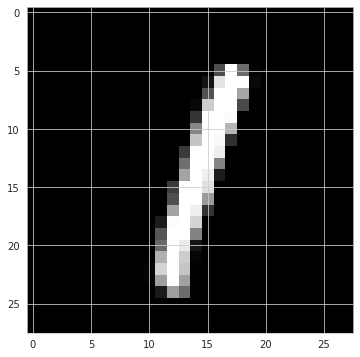

In [ ]:
plt.imshow(my_number.reshape(28,28),cmap="gray");

In [ ]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))
pred_prob                                             # ************************resmi girerken kaç TANE GİRECEĞİMİZİ SÖYLEMEMİZ GEREKİYOR!!!!!!!!!!

array([[3.5648458e-07, 9.9858046e-01, 4.7744146e-05, 1.5444331e-05,
        4.7284936e-07, 1.4785397e-07, 6.1704924e-08, 1.3366560e-03,
        1.5635103e-05, 3.1011064e-06]], dtype=float32)

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

1

<BarContainer object of 10 artists>

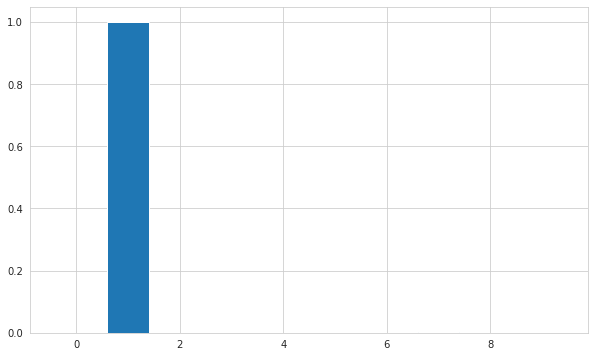

In [ ]:
plt.bar(range(10),pred_prob[0])

In [ ]:
model.save("cnn-1.h5")

# Using

In [ ]:
model=tf.keras.models.load_model('cnn-1.h5')

In [ ]:
X_test[24].shape

(28, 28, 1)

In [ ]:
np.expand_dims(X_test[24],axis=0).shape               # expand dim= 1 boyut daha ekliyorum reshape de yapabiliriz.

(1, 28, 28, 1)

In [ ]:
pred=model.predict(np.expand_dims(X_test[24],axis=0))               # YENİ BİR PREDİCT:BİZ EN YUKARIDA XTESTLERİ DE SCALE ETTİK AMA SCALE EDİLMEMİŞ BİR RESİM GELİRSE EĞER
                                                                    # SCALE ETMEYİ UNUTMAYALIM MUTLAKA ÇÜNKÜ MODELİ ÖYLE EĞİTTİK

In [ ]:
pred

array([[2.4462863e-06, 8.4111598e-08, 2.4499500e-04, 4.9653304e-06,
        9.9279058e-01, 8.0205746e-06, 9.6884451e-06, 3.3234423e-03,
        5.8245341e-06, 3.6099320e-03]], dtype=float32)

In [ ]:
np.argmax(pred)

4

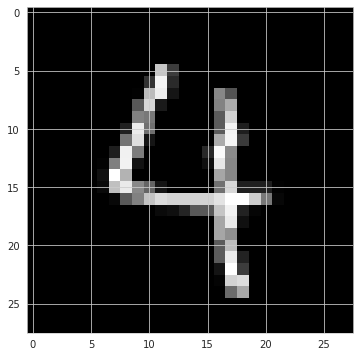

In [ ]:
plt.imshow(X_test[24].reshape(28,28),cmap="gray")

<BarContainer object of 10 artists>

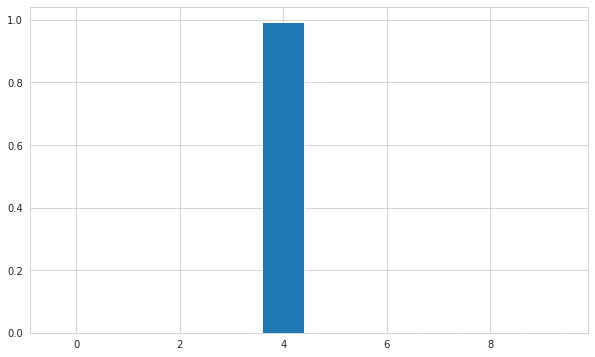

In [ ]:
plt.bar(range(10),pred[0])